Firstly, lets import all the important modules and packages.

In [1]:
from src.ranker import preprocess_data, compute_similarity, compute_similarity_with_weights, sort_resumes_by_similarity, print_top_n_resumes
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load and preprocess the Resumes.<br>
--> You can pass any csv file to preprocess_data function but it should contain a column titled 'Resume'

In [2]:
df = preprocess_data('resumes.csv')
documents = df['cleaned_resume'].fillna('')

Lets take a look at the available Resumes

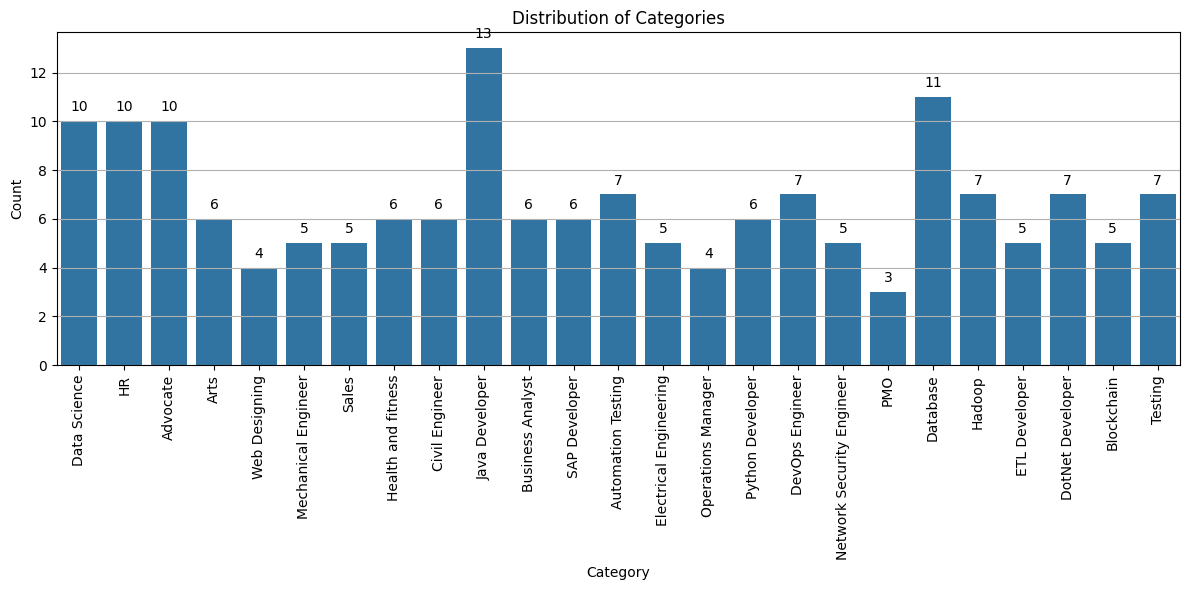

In [3]:
plt.figure(figsize=(12, 6))  # Set figure size

# Create the countplot with seaborn
ax = sns.countplot(x="Category", data=df)

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Categories')  # Add title
plt.xlabel('Category')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.grid(axis='y')  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Define Keywords for the specific role.

In [10]:
# Java Developer
keywords = ["java", "spring", "hibernate", "maven", "J2EE", "SQL", "RESTful", "API", "JavaScript", "HTML", "CSS", "Git"]
keyword_weights = [1.0, 0.7, 0.7, 0.8, 0.9, 0.6, 0.8, 0.9, 1.0, 0.7, 0.7, 0.5]  # Example weights, adjust as needed

#Data Science
#keywords = ["Python", "R", "SQL", "Machine Learning", "Statistics", "Data Visualization", "Data Cleaning", "Data Mining", "Big Data", "Deep Learning", "Natural Language Processing (NLP)", "Time Series Analysis", "Cloud Computing", "Experiment Design", "Domain Knowledge"]

#Advocate
#advocate_job_keywords = ["Legal Research", "Litigation", "Legal Writing", "Courtroom Advocacy", "Case Management", "Legal Analysis", "Client Counseling", "Legal Advice", "Negotiation", "Legal Documentation", "Trial Preparation", "Dispute Resolution", "Legal Representation", "Contract Law", "Civil Rights", "Criminal Law", "Family Law", "Corporate Law", "Regulatory Compliance", "Legal Ethics"]


In [11]:
cosine_similarities = compute_similarity_with_weights(documents, keywords, keyword_weights)
ranked_resumes = sort_resumes_by_similarity(documents, cosine_similarities)
print_top_n_resumes(df, ranked_resumes, n=10)

Top 10 ranked resumes:
Rank 1: Resume Index: 71, Similarity Score: 0.09113019794896066
Education Details January 2016 B E Information Technology Pune Maharashtra Sawitribai Phule Pune University Java Developer Java Developer Vertical Software Skill Details Company Details company Vertical Software description Expertise in design and development of web applications using J2EE Servlets JSP JavaScript HTML CSS JQUERY AJAX JSON Experienced in developing applications using MVC architecture Good understanding of Software Development Life Cycle Phases such as Requirement gathering analysis design development and unit testing Languages open Source Java J2EE Spring Hibernate Frame Work Scripting Languages Server Java JSP Servlets DB Connectivity s Side Program JDBC JavaScript jQuery Ajax JSON Application Server TomCat Database MongoDB MySql IDEs Eclipse 1 Project Title Expense Ledger Role Java Developer Tools and Technologies Java Jsp Servlet MySql JavaScript Json Jquery Ajax 2 Project Title Tr

Compute Similarity, Rank Resumes and Print the top n Resumes.

In [5]:
cosine_similarities = compute_similarity(documents, keywords)   
ranked_resumes = sort_resumes_by_similarity(documents, cosine_similarities)
print_top_n_resumes(df, ranked_resumes, n=10) #Change n to how many resumes you want to print.

Top 10 ranked resumes:
Rank 1: Resume Index: 71, Similarity Score: 0.09113019794896066
Education Details January 2016 B E Information Technology Pune Maharashtra Sawitribai Phule Pune University Java Developer Java Developer Vertical Software Skill Details Company Details company Vertical Software description Expertise in design and development of web applications using J2EE Servlets JSP JavaScript HTML CSS JQUERY AJAX JSON Experienced in developing applications using MVC architecture Good understanding of Software Development Life Cycle Phases such as Requirement gathering analysis design development and unit testing Languages open Source Java J2EE Spring Hibernate Frame Work Scripting Languages Server Java JSP Servlets DB Connectivity s Side Program JDBC JavaScript jQuery Ajax JSON Application Server TomCat Database MongoDB MySql IDEs Eclipse 1 Project Title Expense Ledger Role Java Developer Tools and Technologies Java Jsp Servlet MySql JavaScript Json Jquery Ajax 2 Project Title Tr